In [87]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt

In [88]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200

plt.rc('font', size=15) #controls default text size
# plt.rc('axes', titlesize=10) #fontsize of the title
# plt.rc('axes', labelsize=10) #fontsize of the x and y labels
# plt.rc('xtick', labelsize=10) #fontsize of the x tick labels
# plt.rc('ytick', labelsize=10) #fontsize of the y tick labels
# plt.rc('legend', fontsize=10) #fontsize of the legend

### DATA

- C:\Code_Simulation\Python\SAW-Simulation-2023\Data-from-COMSOL\LN-WG-data1-Y11-20230212v1.txt
- Data-from-COMSOL\LN-WG-data1-Y11_imag-6GHz-20230212v1.txt
- Data-from-COMSOL\LN-WG-data1-Y11_imag-0-1GHz-20230212v1.txt
- Data-from-COMSOL\LN-WG-data1-N=10-Y11_imag-6.05GHz-20230212v1.txt
- Data-from-COMSOL\LN-WG-data1-N=10-Y11_imag-4-8GHz-20230212v1.txt
- Data-from-COMSOL\LN-WG-data1-N=10-Y11_imag-0-1GHz-20230212v1.txt

In [105]:
DataY_2 = np.loadtxt('Data-from-COMSOL\LN-WG-data1-N=10-Y11_imag-4-8GHz-20230212v1.txt', dtype = float, comments='%', unpack=True)

DataY_1 = np.loadtxt('Data-from-COMSOL\LN-WG-data1-N=10-Y11_imag-6.05GHz-20230212v1.txt', dtype = float, comments='%', unpack=True)
# DataY_1 = np.loadtxt('Data-from-COMSOL\LN-WG-data1-Y11_imag-6GHz-20230212v1.txt', dtype = float, comments='%', unpack=True)
DataY_0 = np.loadtxt('Data-from-COMSOL\LN-WG-data1-N=10-Y11_imag-0-1GHz-20230212v1.txt', dtype = float, comments='%', unpack=True)

In [90]:
# N_idt = 1
# DataY_1 *= N_idt
# DataY_0 *= N_idt

Text(0.5, 0, 'f / GHz')

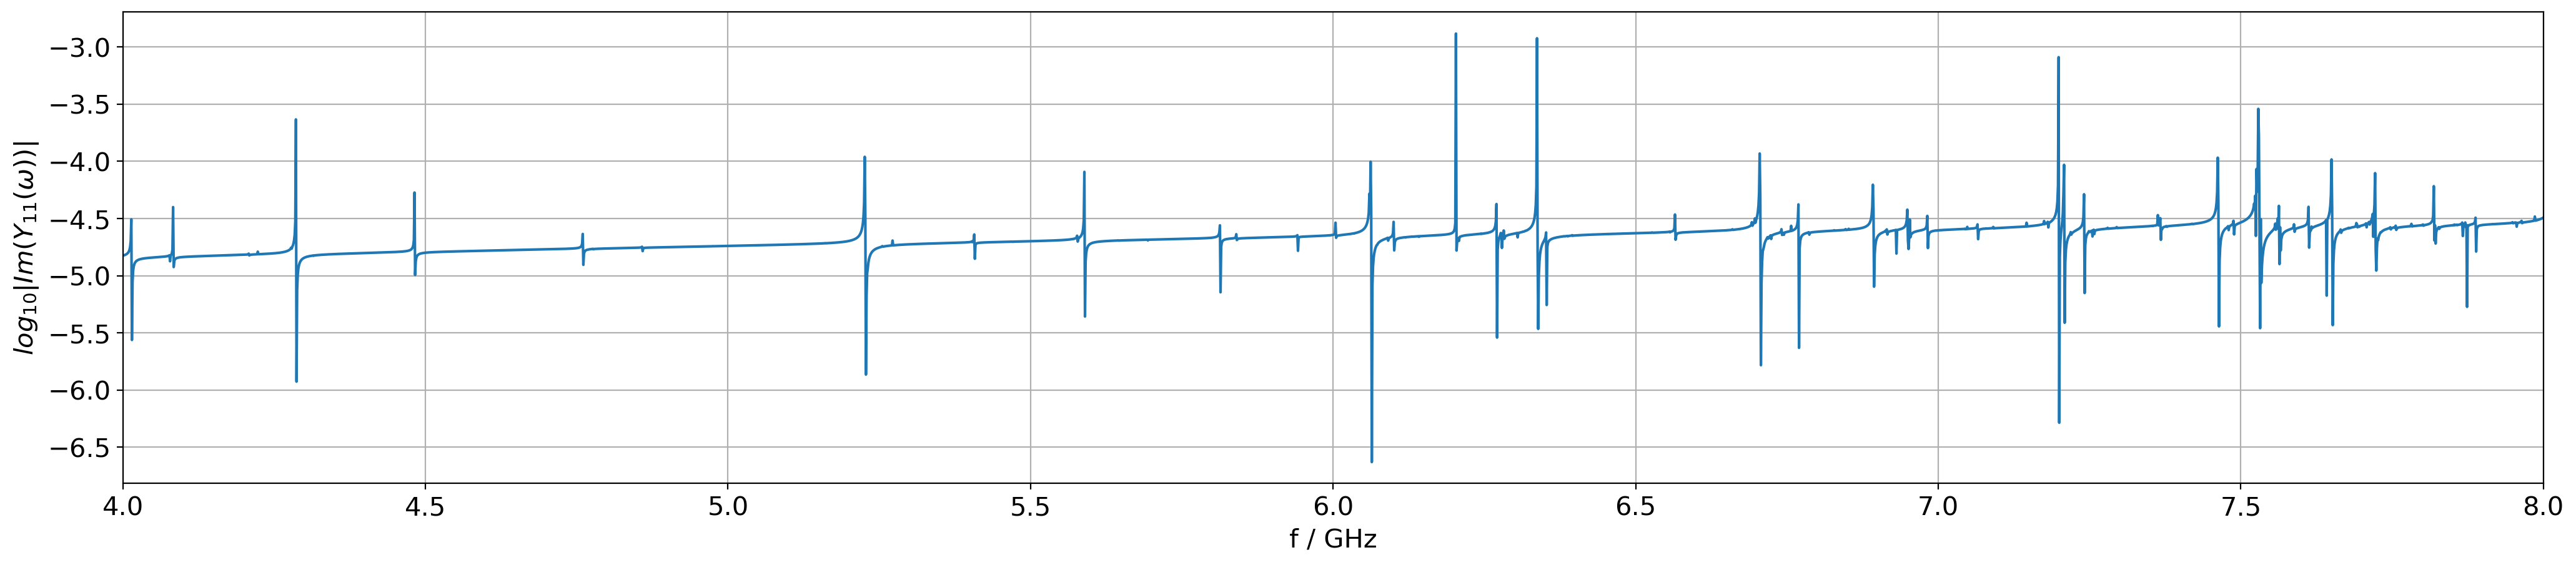

In [107]:
f_list2 = DataY_2[0]
Y11_imag_list2 = DataY_2[1]

fig = plt.figure(figsize = [25,5])
ax2 = fig.add_subplot(111)
ax2.plot(f_list2, np.log10(np.abs(Y11_imag_list2)))
ax2.set_xlim([f_list2.min(), f_list2.max()])
ax2.grid()

ax2.set_ylabel(r'$log_{10}\left | Im(Y_{11}(\omega)) \right |$')
ax2.set_xlabel(r'f / GHz')

Text(0.5, 0, 'f / GHz')

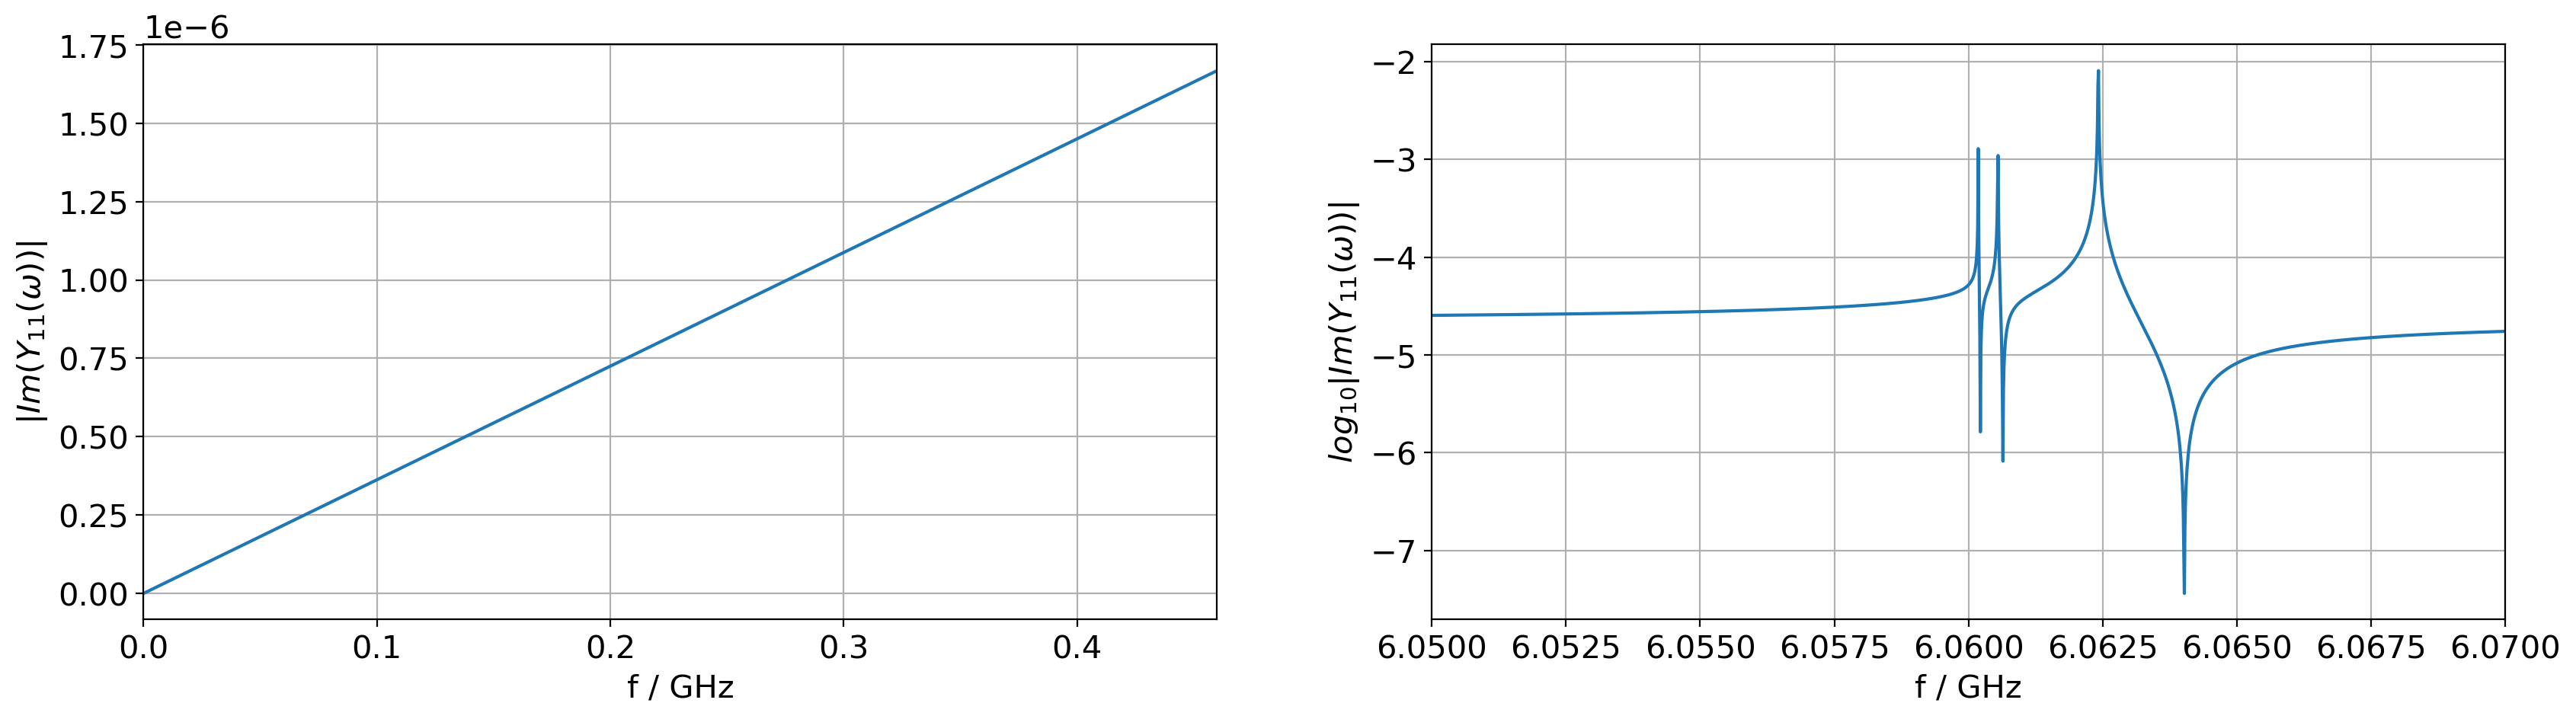

In [108]:
# fig = plt.figure(figsize=[5,5])
f_list1 = DataY_1[0]
Y11_imag_list1 = DataY_1[1]
f_list0 = DataY_0[0]
Y11_imag_list0 = DataY_0[1]

fig = plt.figure(figsize = [20,5])
ax0 = fig.add_subplot(121)
ax0.plot(f_list0, (np.abs(Y11_imag_list0)))
ax0.set_xlim([f_list0.min(), f_list0.max()])
ax0.grid()

ax1 = fig.add_subplot(122)
ax1.plot(f_list1, np.log10(np.abs(Y11_imag_list1)))
ax1.set_xlim([f_list1.min(), f_list1.max()])
ax1.grid()

ax0.set_ylabel(r'$\left | Im(Y_{11}(\omega)) \right |$')
ax0.set_xlabel(r'f / GHz')
ax1.set_ylabel(r'$log_{10}\left | Im(Y_{11}(\omega)) \right |$')
ax1.set_xlabel(r'f / GHz')

(6.0625, 6.0675)

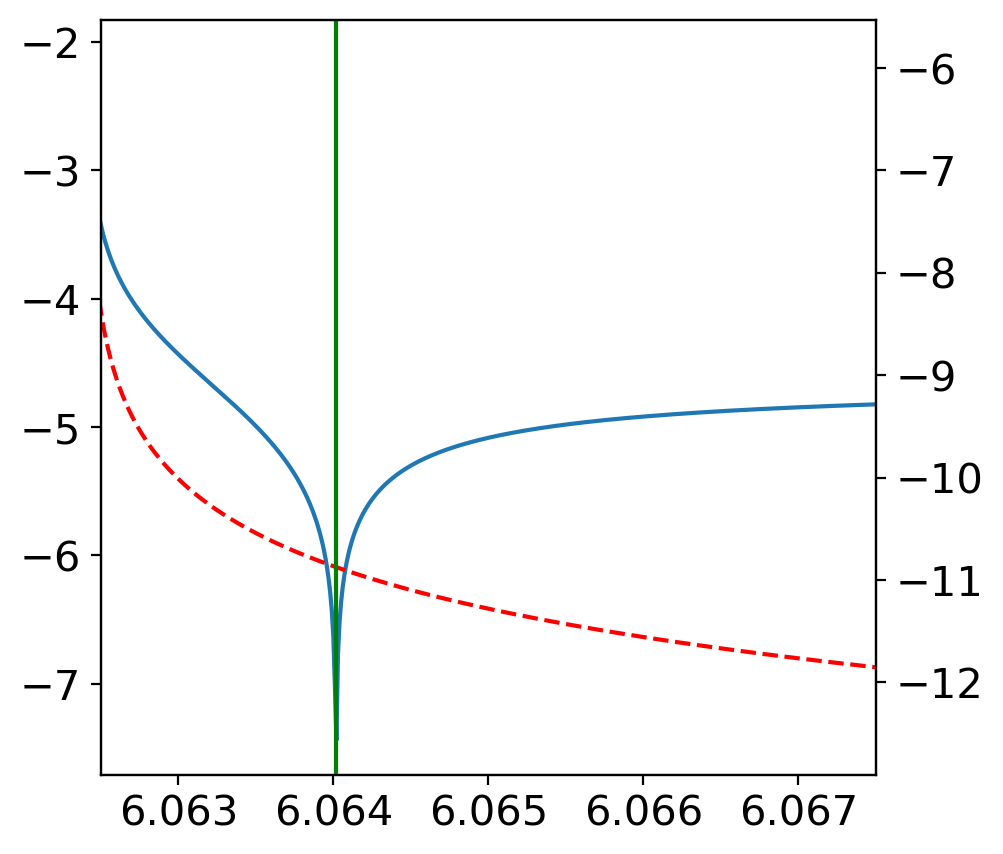

In [109]:
delta_f = (f_list1[1] - f_list1[0])*1e9
Y11imag_diff = np.diff(Y11_imag_list1) / delta_f

fig = plt.figure(figsize=[5,5])
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax1.plot(f_list1, np.log10(np.abs(Y11_imag_list1)))

ax2.plot(f_list1[:-1], np.log10(np.abs(Y11imag_diff)), 'r--')

ax2.axvline(x=f_list1[1402], color = 'g')

# ax2.set_xlim([6.03, 6.04])
# ax2.set_xlim([6.0350, 6.0375])
ax2.set_xlim([6.0625, 6.0675])

In [110]:
# omg_k = 2*np.pi* (f_list1[358]*1e9)
# C_1 = 1/2 *Y11imag_diff[358]
# L_1 = 1 / omg_k**2 / C_1

omg_k = 2*np.pi* (f_list1[1402]*1e9)
C_1 = 1/2 *Y11imag_diff[1402]
L_1 = 1 / omg_k**2 / C_1

delta_f0 = (f_list0[1] - f_list0[0])*1e9
Y11imag_diff0 = np.diff(Y11_imag_list0) / delta_f0

C_0 = Y11imag_diff0[1]

Text(0.5, 0, 'f / GHz')

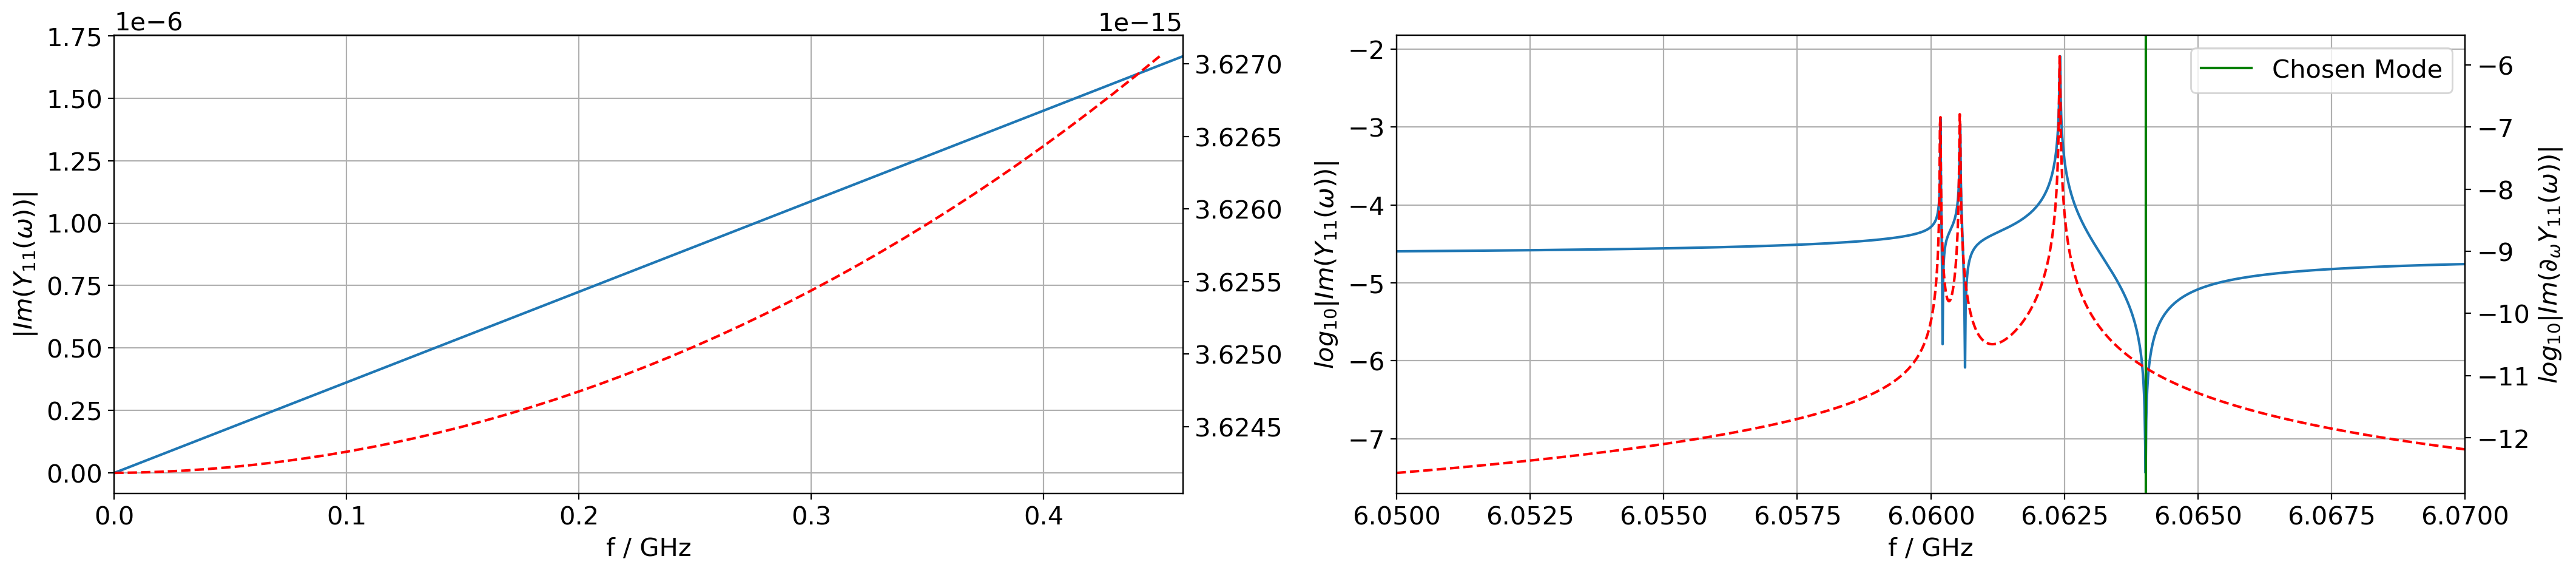

In [111]:
fig = plt.figure(figsize = [25,5])
ax1 = fig.add_subplot(121)
ax1.plot(f_list0, (np.abs(Y11_imag_list0)))
ax1.set_xlim([f_list0.min(), f_list0.max()])
ax1.grid()

ax1a = ax1.twinx()
ax1a.plot(f_list0[:-1], (np.abs(Y11imag_diff0)), 'r--')

ax2 = fig.add_subplot(122)
ax2.plot(f_list1, np.log10(np.abs(Y11_imag_list1)))
ax2.set_xlim([f_list1.min(), f_list1.max()])
ax2.grid()

ax2a = ax2.twinx()
ax2a.plot(f_list1[:-1], np.log10(np.abs(Y11imag_diff)), 'r--')
ax2a.axvline(x=f_list1[1402], color = 'g', label = r'Chosen Mode')
ax2a.legend()


ax1.set_ylabel(r'$\left | Im(Y_{11}(\omega)) \right |$')
ax1.set_xlabel(r'f / GHz')
ax2.set_ylabel(r'$log_{10}\left | Im(Y_{11}(\omega)) \right |$')
ax2a.set_ylabel(r'$log_{10}\left | Im(\partial_{\omega}Y_{11}(\omega)) \right |$')
ax2.set_xlabel(r'f / GHz')

In [115]:
f_list1[1402] / 1e9

6.06402e-09

### Derivation of the coupling strength

In [6]:
from scipy.constants import hbar, e
Phi0 = hbar /(2*e)
h = hbar*(2*np.pi)

In [13]:
import numpy as np
C_0 = 6.45e-7/1e9/2/np.pi
C_1 = C_0 / 0.025
L_1 = 1/(2*np.pi*5.4283e9)**2 /C_1

In [14]:
C_0

1.0265493829427248e-16

In [15]:
EJ = 20e9 # GHz
C_sum = 300e-15 # 1 fF

print('C1 = {:.2f} fF | L1 = {:.2f} nH'.format(C_1/1e-15, L_1/1e-9))
print('C0 = {:.2f} fF'.format(C_0/1e-15))

C1 = 4.11 fF | L1 = 209.35 nH
C0 = 0.10 fF


In [16]:
beta = C_0 / (C_1 + C_sum)

Ec_phi = e**2 / (2*(C_sum + 1/(1/C_0 + 1/C_1))) / h
Ec_tha = e**2 / (2*(C_1 + 1/(1/C_0 + 1/C_sum))) / h
Ec_tha_phi = beta* e**2 / (2*(C_0 + 1/(1/C_1 + 1/C_sum))) / h
EL = Phi0**2 / L_1 / h

nzp_tha = 1/2 * (EL/(2*Ec_tha))**(1/4)
nzp_phi = 1/2 * (EL/(2*Ec_phi))**(1/4)

g = 8*Ec_tha_phi*nzp_phi*nzp_tha /1e6 # MHz
print('g = %.3f MHz'%g)

g = 2.665 MHz
